In [3]:
import tensorflow as tf
import numpy as np
import seaborn as sns
from tensorflow.keras.preprocessing.image import (
    ImageDataGenerator, 
    array_to_img, 
    img_to_array, 
    load_img
)


from sklearn.metrics import confusion_matrix, RocCurveDisplay, ConfusionMatrixDisplay
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

## Working with Images

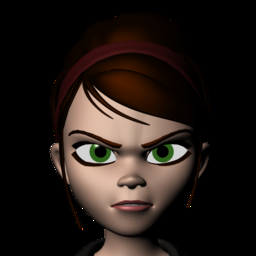

In [4]:
path_to_image = "C:/Users/James Cook/OneDrive/Documents/College/Co-Term/Behavioral Data Science/HW3/mery/mery_anger/mery_anger_111.png"

image = load_img(path_to_image)

image

In [5]:
type(image)

PIL.Image.Image

In [6]:
# Converting from PIL image types to numpy arrays is easy. Explore some properties:
img_array = img_to_array(image)
print(img_array.shape)
print(img_array.max())
print(img_array.min())

(256, 256, 3)
255.0
0.0


In [7]:
# Conversely, numpy arrays can be easily turned into PIL images
array_to_img(img_array).size

(256, 256)

### Understanding `ImageDataGenerator` for Data Augmentation

When training deep learning models, especially in computer vision tasks, having a large dataset is crucial for improving model generalization and performance. However, collecting a large dataset can be challenging. This is where **data augmentation** helps.

#### What is `ImageDataGenerator`?
The `ImageDataGenerator` class in Keras provides a way to augment image data by applying random transformations to images in each batch during training. This helps improve model robustness and prevents overfitting.

#### Code Breakdown:

Each parameter in `ImageDataGenerator` applies a specific transformation:

- `rotation_range=40`: Rotates images randomly within a range of ±40 degrees.
- `width_shift_range=0.2`: Shifts the image horizontally by up to 20% of the image width.
- `height_shift_range=0.2`: Shifts the image vertically by up to 20% of the image height.
- `rescale=1./255`: Normalizes pixel values by scaling them between 0 and 1.
- `shear_range=0.2`: Applies a shear transformation with a magnitude of 20%.
- `zoom_range=0.2`: Zooms into or out of the image by up to 20%.
- `horizontal_flip=True`: Randomly flips images horizontally.
- `fill_mode='nearest'`: Determines how pixels are filled in after transformations (nearest neighbor interpolation in this case).

In [8]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
)

Below is an example of how to create a training generator that will fetch batches from disk instead of loading the full data. You should split the data into train / test folders and create a train and validation generators.

In [9]:
train_directory = "C:/Users/James Cook/OneDrive/Documents/College/Co-Term/Behavioral Data Science/HW3/mery"
test_directory = "C:/Users/James Cook/OneDrive/Documents/College/Co-Term/Behavioral Data Science/HW3/mery_test"


#Ask professor if this is normalizing before or after splitting
datagen = ImageDataGenerator(rescale = 1./255, validation_split=0.3)
testgen = ImageDataGenerator(rescale = 1./255)

train_generator = datagen.flow_from_directory(
        train_directory,
        target_size=(64, 64), # we will reduce the size of images for faster training
        batch_size=8, # we will use a smaller batch size
        class_mode = "categorical",
        subset = "training"
)



val_generator = datagen.flow_from_directory(
        train_directory,
        target_size=(64, 64), # we will reduce the size of images for faster training
        batch_size=8, # we will use a smaller batch size
        class_mode =  "categorical",
        subset = "validation"
)

test_generator = testgen.flow_from_directory(
        test_directory,
        target_size=(64, 64), # we will reduce the size of images for faster training
        batch_size=8, # we will use a smaller batch size
        class_mode =  "categorical"
)

print("Total training samples:", train_generator.samples)
print("Total validation samples:", val_generator.samples)
print("Total test samples:", test_generator.samples)


Found 4554 images belonging to 7 classes.
Found 1949 images belonging to 7 classes.
Found 1055 images belonging to 7 classes.
Total training samples: 4554
Total validation samples: 1949
Total test samples: 1055


In [10]:
train_generator

### Building the Convolutional Neural Network (CNN)

In [11]:
### Your code here
model  = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(7, activation =  'softmax'))

c:\Users\James Cook\anaconda3\envs\behavioral-data-science\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       294,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 314,823 (1.20 MB)

 Trainable params: 314,823 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

### Training the Network

In [13]:
### Your code here
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = model.fit(train_generator, validation_data=val_generator, epochs = 5)

c:\Users\James Cook\anaconda3\envs\behavioral-data-science\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
570/570 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.6011 - loss: 1.0031 - val_accuracy: 1.0000 - val_loss: 0.0072
Epoch 2/5
570/570 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.9442 - loss: 0.1246 - val_accuracy: 1.0000 - val_loss: 1.7949e-04
Epoch 3/5
570/570 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.9583 - loss: 0.0910 - val_accuracy: 1.0000 - val_loss: 1.5759e-04
Epoch 4/5
570/570 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.9691 - loss: 0.0767 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 5/5
570/570 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.9628 - loss: 0.0916 - val_accuracy: 1.0000 - val_loss: 2.5472e-04


### Evaluation

In [14]:
### Your code here
model.evaluate(test_generator)


132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9992 - loss: 0.0079


[0.00888366810977459, 0.999052107334137]

In [15]:
#train_prediction = model.predict(train_generator)
test_prediction = model.predict(test_generator)


132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step


In [16]:
#val_prediction is y_pred basically
val_prediction = model.predict(val_generator)


244/244 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step


In [17]:
val_labels = np.argmax(val_prediction,axis = 1)
test_labels = np.argmax(test_prediction,axis = 1)

In [18]:
#train_generator.classes

train_generator.labels

val_generator.labels

test_generator.labels

array([0, 0, 0, ..., 6, 6, 6])

In [19]:
#validation_cm = confusion_matrix(val_generator.labels, val_labels)
validation_cm = confusion_matrix(val_generator.labels, val_labels)
test_cm = confusion_matrix(test_generator.labels, test_labels)

In [ ]:
#print(nn_model_cm)

NameError: name 'nn_model_cm' is not defined

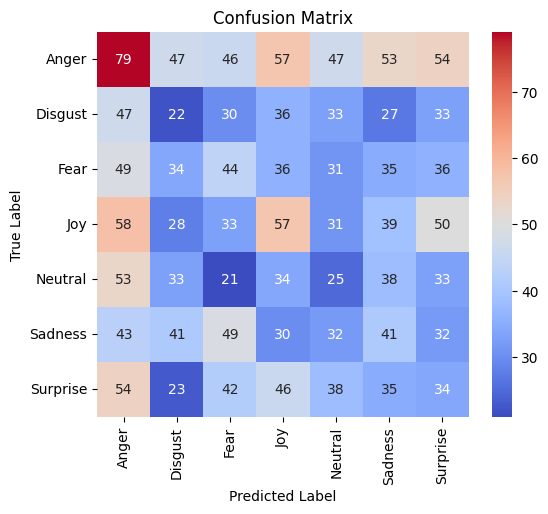

In [22]:
labels = ["Anger", "Disgust", "Fear", "Joy", "Neutral", "Sadness", "Surprise"]


plt.figure(figsize=(6, 5))
sns.heatmap(validation_cm, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

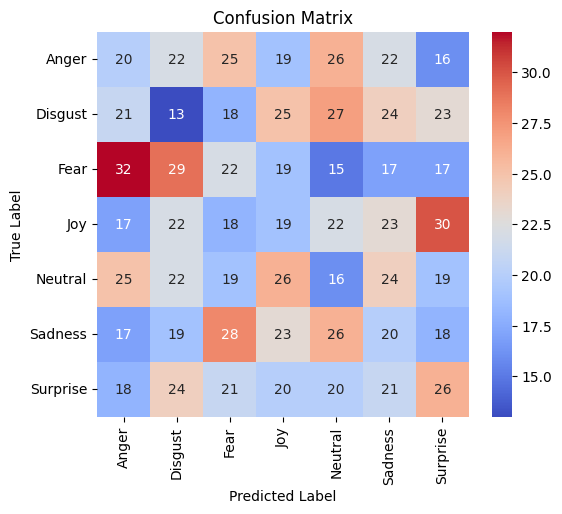

In [23]:

#display = ConfusionMatrixDisplay(validation_cm)

#display.plot()

plt.figure(figsize=(6, 5))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()